In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data1 = pd.read_csv(r'C:\Users\HP\Downloads\Walmart (2).csv')
data1.set_index('Date', inplace=True)
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store = data1[data1.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:32


Weekly_Sales    float64
dtype: object

<Figure size 432x288 with 0 Axes>

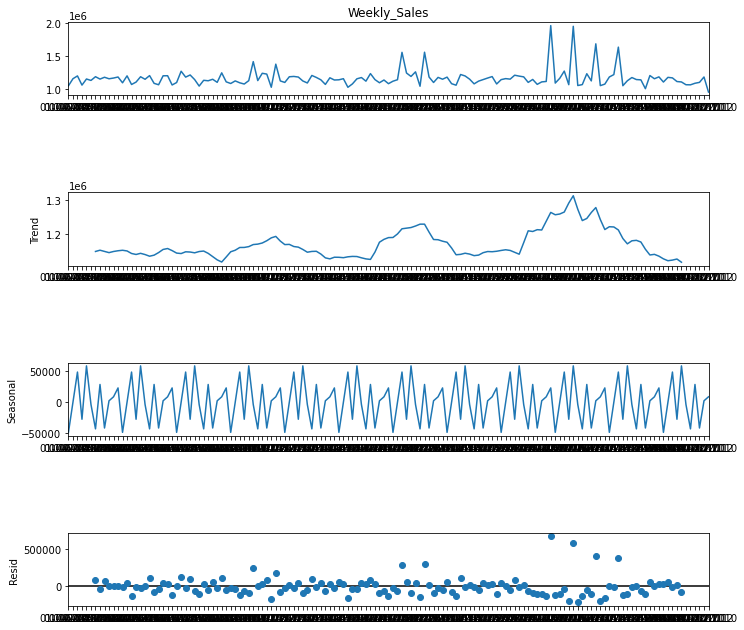

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [16]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,1051121.02
01-06-2012,1157557.79
01-07-2011,1199845.29
01-10-2010,1061089.56
02-03-2012,1153332.89
02-04-2010,1131732.94
02-07-2010,1187988.64
02-09-2011,1152117.50
02-12-2011,1179773.88


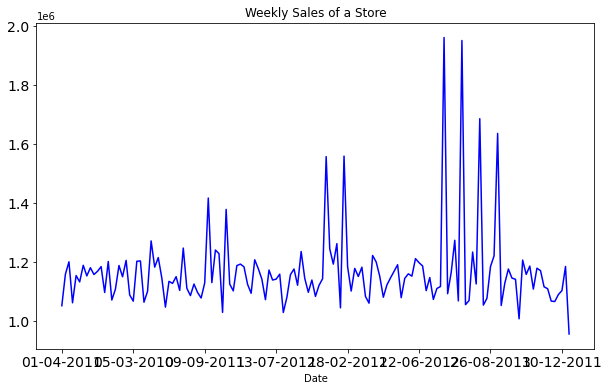

In [17]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

In [18]:
#remove date from index to change its dtype because it clearly isnt acceptable.
sales.reset_index(inplace = True)
#converting 'date' column to a datetime type
sales['Date'] = pd.to_datetime(sales['Date'])
# resetting date back to the index
sales.set_index('Date',inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1760\1042104552.py:4: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\1042104552.py:4: UserWarning: Parsing '13-04-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\1042104552.py:4: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\1042104552.py:4: UserWarning: Parsing '13-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
C:\Users\HP\AppData\Loca

In [19]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store5 = data1[data1.Store == 5]
# there are about 45 different stores in this dataset.

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales5.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales5['Date'] = pd.to_datetime(sales5['Date'])
# resetting date back to the index
sales5.set_index('Date',inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1760\337423408.py:14: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\337423408.py:14: UserWarning: Parsing '13-04-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\337423408.py:14: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\337423408.py:14: UserWarning: Parsing '13-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])
C:\Users\HP\AppD

In [20]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

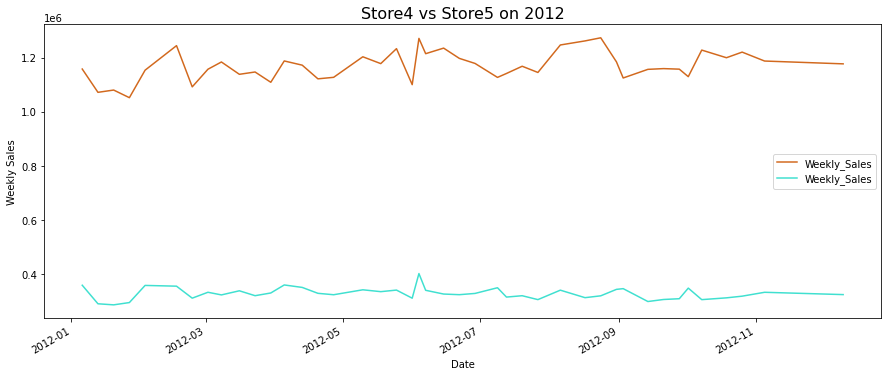

In [21]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [22]:
# Clearly we can see the irregularities 

In [23]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [24]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2196      0.361     -3.383      0.001      -1.926      -0.513
ar.L2         -1.0483      0.566     -1.853      0.064      -2.157       0.061
ar.L3         -0.7197      0.421     -1.711      0.087      -1.544       0.105
ar.L4         -0.5769      0.186     -3.106      0.002      -0.941      -0.213
ma.L1         -2.1506      0.399     -5.385      0.000      -2.933      -1.368
ma.L2          1.3323      0.812      1.641      0.101      -0.259       2.924
ma.L3         -0.1778      0.441     -0.404      0.687      -1.041       0.686
ar.S.L52      -0.2969      0.141     -2.102      0.036      -0.574      -0.020
sigma2      9.021e+10   6.54e-12   1.38e+22      0.000    9.02e+10    9.02e+10


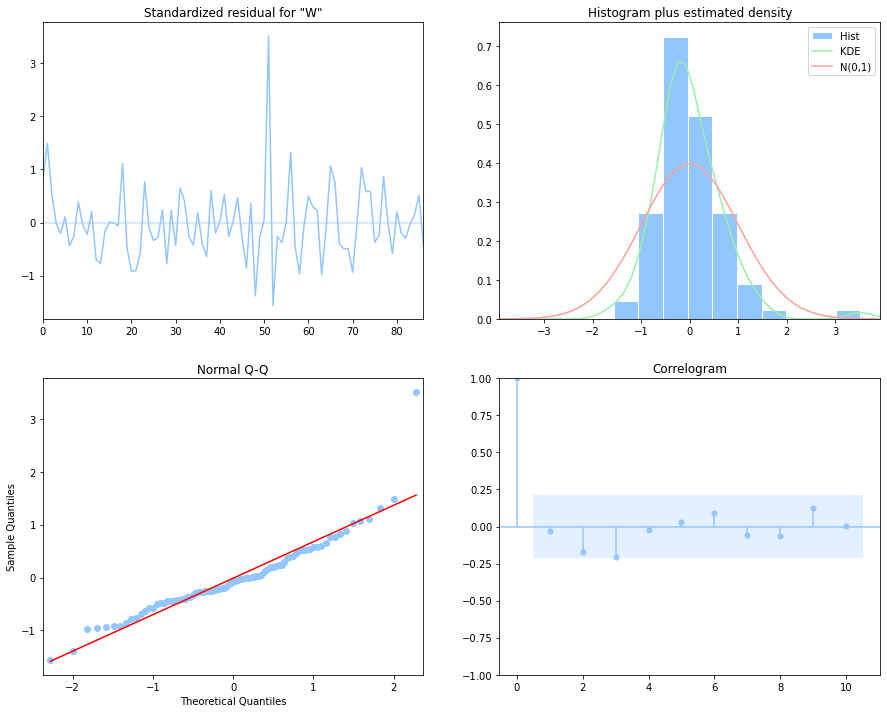

In [25]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [86]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

C:\Users\HP\AppData\Local\Temp\ipykernel_8504\2689329424.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


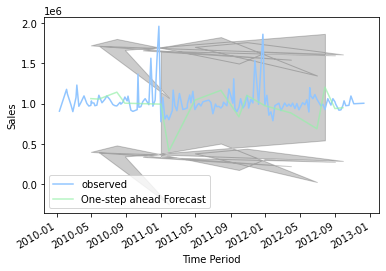

In [87]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [88]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 28636274043.18


In [89]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\HP\AppData\Local\Temp\ipykernel_8504\4127785946.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


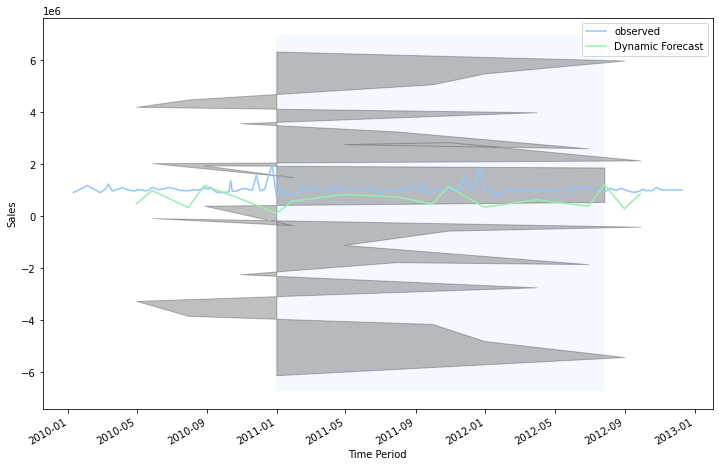

In [90]:


ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [91]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    1.205017e+06
2010-08-27    1.174084e+06
2011-01-28    5.742142e+05
2010-05-28    9.777730e+05
2012-09-28    8.650936e+05
2011-10-28    1.139981e+06
2011-04-29    8.276909e+05
2012-06-29    3.782356e+05
2011-07-29    7.410754e+05
2010-10-29    6.647317e+05
2012-03-30    6.252202e+05
2010-04-30    4.688193e+05
2010-07-30    3.216021e+05
2011-09-30    4.587662e+05
2011-12-30    3.399325e+05
2012-08-31    2.798574e+05
2010-12-31    1.031730e+05
Name: predicted_mean, dtype: float64


In [92]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-06    1061134.37
2012-09-03     991127.01
2012-10-02    1034448.07
2012-10-08     973812.79
2012-11-05     997868.63
2012-12-10    1004039.84
2012-09-14     918049.28
2012-08-17     981273.26
2012-10-19     978027.95
2012-09-21     921612.53
2012-08-24    1060906.75
2012-10-26    1094422.69
2012-07-27     925731.21
2012-09-28     976479.51
2012-08-31    1022270.86
Name: Weekly_Sales, dtype: float64


In [93]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 462451.92


In [94]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1133085.4740104112


In [95]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [96]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

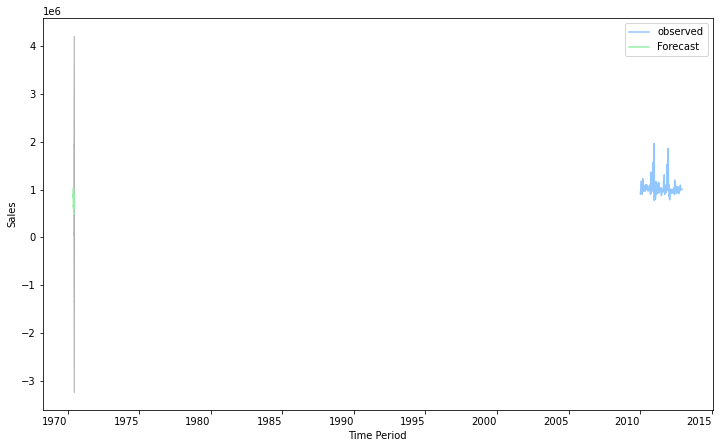

In [97]:


ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

